In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("File Path....", sep = ",")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


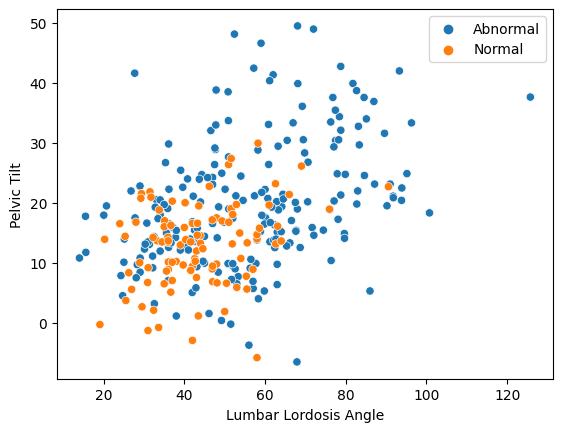

In [ ]:
sns.scatterplot(data=data, x="lumbar_lordosis_angle", y="pelvic_tilt numeric", hue="class")
plt.xlabel("Lumbar Lordosis Angle")
plt.ylabel("Pelvic Tilt")
plt.legend()
plt.show()

In [ ]:
#Abnormal 1, Normal to 0
data["class"] = [1 if each == "Abnormal" else 0 for each in data["class"]]
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [ ]:
#Assign classes to variable y and the remaining values to variable x
y = data["class"].values 
x_data = data.drop(["class"], axis=1)

#Normalization
X = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [ ]:
#Train-test split
from sklearn.model_selection import train_test_split

# 85% train, 15% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)

In [ ]:
#kNN Model
from sklearn.neighbors import KNeighborsClassifier
num_neighbor = 4
knn = KNeighborsClassifier(n_neighbors = num_neighbor)
knn.fit(X_train, y_train)

prediction = knn.predict(X_test)
print("k = {} kNN Accuracy: {}".format(num_neighbor, knn.score(X_test, y_test)))

k = 4 kNN Accuracy: 0.7446808510638298


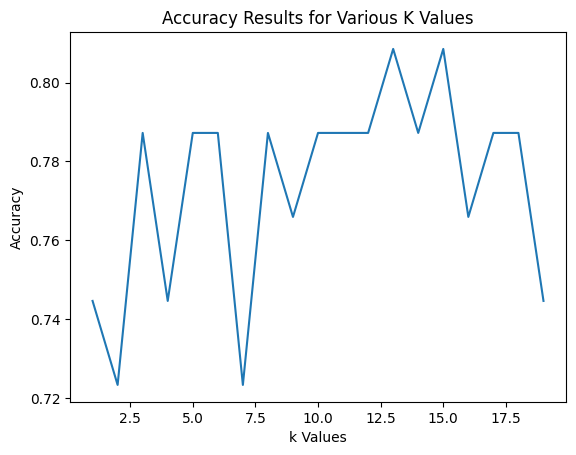

In [ ]:
#To Find Best K value
score_list = []
for each in range(1,20):
  knn2 = KNeighborsClassifier(n_neighbors = each)
  knn2.fit(X_train, y_train)
  score_list.append(knn2.score(X_test, y_test))

plt.plot(range(1,20), score_list)
plt.xlabel("k Values")
plt.ylabel("Accuracy")
plt.title("Accuracy Results for Various K Values")
plt.show()